In [34]:
import netCDF4
import pandas
import numpy
%matplotlib inline

In [35]:
# read data from the input (POES) file
inpFil = "/Users/bharat/Desktop/poes_n19_20150617_proc.nc"
poesRawData = netCDF4.Dataset(inpFil)
for i in poesRawData.variables.iterkeys():
    print i

time
year
day
msec
satID
sat_direction
alt
lat
lon
mep_pro_tel0_flux_p1
mep_pro_tel0_flux_p2
mep_pro_tel0_flux_p3
mep_pro_tel0_flux_p4
mep_pro_tel0_flux_p5
mep_pro_tel0_flux_p6
mep_pro_tel0_flux_p1_err
mep_pro_tel0_flux_p2_err
mep_pro_tel0_flux_p3_err
mep_pro_tel0_flux_p4_err
mep_pro_tel0_flux_p5_err
mep_pro_tel0_flux_p6_err
mep_pro_tel90_flux_p1
mep_pro_tel90_flux_p2
mep_pro_tel90_flux_p3
mep_pro_tel90_flux_p4
mep_pro_tel90_flux_p5
mep_pro_tel90_flux_p6
mep_pro_tel90_flux_p1_err
mep_pro_tel90_flux_p2_err
mep_pro_tel90_flux_p3_err
mep_pro_tel90_flux_p4_err
mep_pro_tel90_flux_p5_err
mep_pro_tel90_flux_p6_err
mep_ele_tel0_flux_e1
mep_ele_tel0_flux_e2
mep_ele_tel0_flux_e3
mep_ele_tel0_flux_e4
mep_ele_tel0_flux_e1_err
mep_ele_tel0_flux_e2_err
mep_ele_tel0_flux_e3_err
mep_ele_tel0_flux_e4_err
mep_ele_tel90_flux_e1
mep_ele_tel90_flux_e2
mep_ele_tel90_flux_e3
mep_ele_tel90_flux_e4
mep_ele_tel90_flux_e1_err
mep_ele_tel90_flux_e2_err
mep_ele_tel90_flux_e3_err
mep_ele_tel90_flux_e4_err
mep_omni_

In [36]:
poesDF = pandas.DataFrame( poesRawData.variables['time'][:], columns=[ "timestamp" ] )
poesDF['date'] = pandas.to_datetime(poesDF['timestamp'], unit='ms')
poesDF["alt"] = poesRawData.variables['alt'][:]
poesDF["aacgm_lat_foot"] = poesRawData.variables['aacgm_lat_foot'][:]
poesDF["aacgm_lon_foot"] = poesRawData.variables['aacgm_lon_foot'][:]
poesDF["MLT"] = poesRawData.variables['MLT'][:]
poesDF["ted_ele_eflux_atmo_total"] = poesRawData.variables['ted_ele_eflux_atmo_total'][:]
poesDF["ted_ele_eflux_atmo_total_err"] = poesRawData.variables['ted_ele_eflux_atmo_total_err'][:]
poesDF["ted_pro_eflux_atmo_total"] = poesRawData.variables['ted_pro_eflux_atmo_total'][:]
poesDF["ted_pro_eflux_atmo_total_err"] = poesRawData.variables['ted_pro_eflux_atmo_total_err'][:]
# poesDF.head()

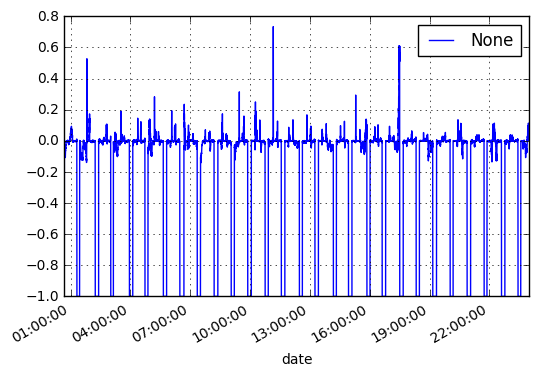

In [38]:
poesDF.plot(x="date",y="ted_pro_eflux_atmo_total")